## Introduction
As you know, data comes with a lot of errors. In this lab we propose you a challenge. We have purposely added some errors to the famous [Iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set). Let's take a look on the data and fix some possible errors as:
* Data is encoded properly.

* Data falls within the expected range, and use domain knowledge whenever possible to define that expected range.

* Deal with missing data in one way or another: replace it if you can or drop it.


## Some advices:

* Never tidy your data manually because that is not easily reproducible

* Use code as a record of how you tidied your data

* Plot everything you can about the data at this stage of the analysis so you can visually confirm everything looks correct

## Deliverables
* A notebook with the code you used to clean the data.
* The final data in a csv.

In [1]:
# import libraries

import numpy as np
import pandas as pd
pd.set_option('display.max_columns',None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

In [132]:
# accquire data

iris = pd.read_csv('iris-data.csv')
iris.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
# check data
print(iris.shape)
iris.dtypes

(150, 5)


sepal_length_cm    float64
sepal_width_cm     float64
petal_length_cm    float64
petal_width_cm     float64
class               object
dtype: object

In [6]:
# check Nulls

iris.isna().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [10]:
iris[iris['petal_width_cm'].isna()==True]
'''
truncate 5 sets of data out of 150 sets total might introduce bias due to 3% data elimination.
fill in Nulls instead.'''

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


In [133]:
iris['petal_width_cm'].fillna(np.mean(iris['petal_width_cm']),inplace=True)
iris.isna().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     0
class              0
dtype: int64

In [17]:
corr = iris.corr()

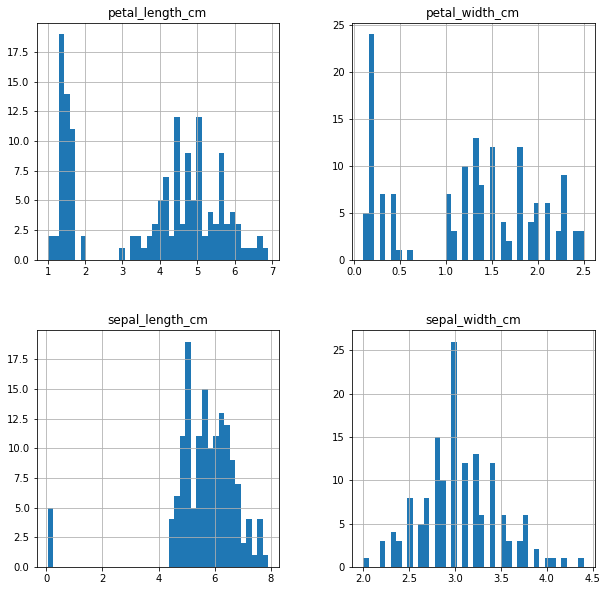

In [20]:
iris.hist(bins=40, figsize=(10,10))
plt.show()

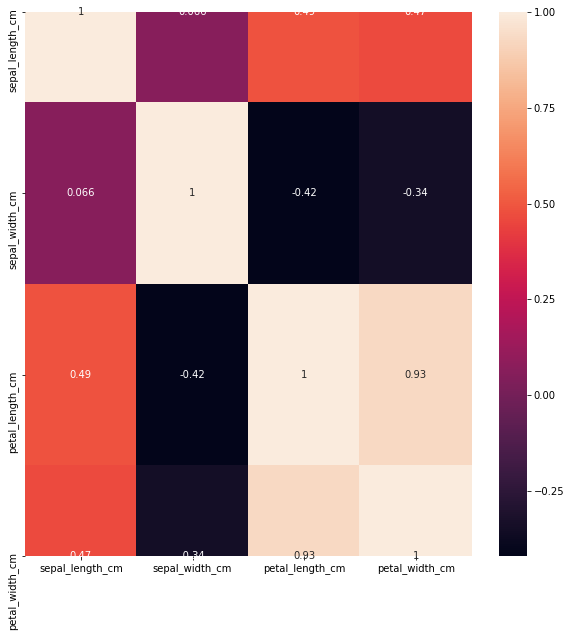

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [134]:
def updateVal(x):
    a = {'Iris-setosa':'Iris-setosa',
         'Iris-setossa':'Iris-setosa',
         'Iris-versicolor':'Iris-versicolor',
         'versicolor':'Iris-versicolor',
         'Iris-virginica':'Iris-virginica'}
    x = a[x]
    return x

iris['class']=list(map(updateVal,iris['class']))
iris['class'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: class, dtype: int64

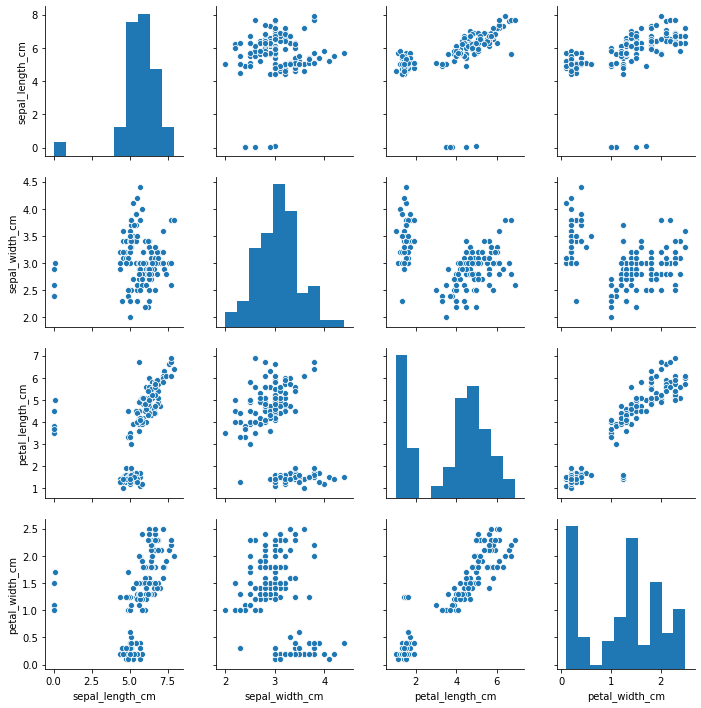

In [104]:
g = sns.pairplot(iris)

In [107]:
iris.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.742281
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [113]:
pd.cut(iris['sepal_length_cm'],10).value_counts()

(5.546, 6.331]    49
(4.762, 5.546]    46
(6.331, 7.116]    30
(7.116, 7.9]      10
(3.978, 4.762]    10
(0.0472, 0.84]     5
(3.193, 3.978]     0
(2.409, 3.193]     0
(1.624, 2.409]     0
(0.84, 1.624]      0
Name: sepal_length_cm, dtype: int64

In [135]:
ir = iris[iris['sepal_length_cm']>0.84]
pd.cut(ir['sepal_length_cm'],10).value_counts()

(4.75, 5.1]      30
(5.45, 5.8]      27
(6.15, 6.5]      25
(5.8, 6.15]      14
(6.5, 6.85]      12
(5.1, 5.45]      11
(4.397, 4.75]    10
(6.85, 7.2]       9
(7.55, 7.9]       5
(7.2, 7.55]       2
Name: sepal_length_cm, dtype: int64

In [123]:
pd.cut(ir['petal_length_cm'],10).value_counts()

(0.994, 1.59]    37
(4.54, 5.13]     28
(3.95, 4.54]     25
(5.13, 5.72]     18
(1.59, 2.18]     13
(5.72, 6.31]     11
(6.31, 6.9]       5
(3.36, 3.95]      5
(2.77, 3.36]      3
(2.18, 2.77]      0
Name: petal_length_cm, dtype: int64

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


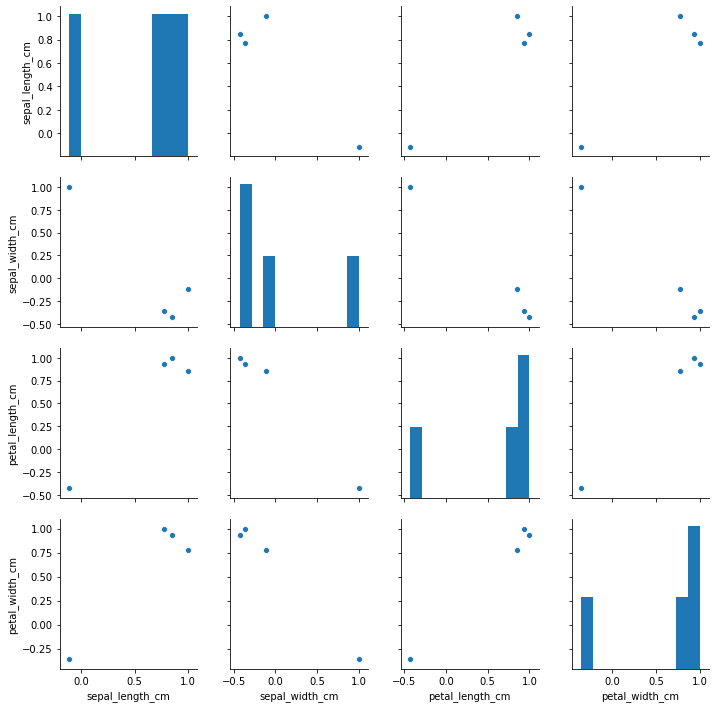

In [165]:

sns.pairplot(ir.corr())
ir

In [ ]:
q1 = np.percentile(ir['households'], 25)
q3 = np.percentile(data['households'], 75)
iqr = q3 - q1
upper_fence = q3 + 2 * iqr
data = data[(data['households'] < upper_fence)]
data['households'].hist()
plt.show()

In [73]:
encoder = OneHotEncoder()
encoded = encoder.fit_transform(pd.DataFrame(iris['class'])).toarray()
cls = pd.DataFrame(encoded)
iris_df = pd.concat([iris,cls], axis=1)
iris_cls = list(iris['class'].unique())
iris_df.drop(['class'],axis=1,inplace=True)
iris_df

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,0,1,2,3,4
0,5.1,3.5,1.4,0.2,1.0,0.0,0.0,0.0,0.0
1,4.9,3.0,1.4,0.2,1.0,0.0,0.0,0.0,0.0
2,4.7,3.2,1.3,0.2,1.0,0.0,0.0,0.0,0.0
3,4.6,3.1,1.5,0.2,1.0,0.0,0.0,0.0,0.0
4,5.0,3.6,1.4,0.2,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0.0,0.0,0.0,1.0,0.0
146,6.3,2.5,5.0,2.3,0.0,0.0,0.0,1.0,0.0
147,6.5,3.0,5.2,2.0,0.0,0.0,0.0,1.0,0.0
148,6.2,3.4,5.4,2.3,0.0,0.0,0.0,1.0,0.0


In [70]:
iris_cls

['Iris-setosa',
 'Iris-setossa',
 'Iris-versicolor',
 'versicolor',
 'Iris-virginica']

In [76]:
app_col = ['sepal_length_cm',  'sepal_width_cm', 'petal_length_cm',
        'petal_width_cm']

In [87]:
i_df = iris_df[app_col].apply(np.log)
i_df

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
0,1.629241,1.252763,0.336472,-1.609438
1,1.589235,1.098612,0.336472,-1.609438
2,1.547563,1.163151,0.262364,-1.609438
3,1.526056,1.131402,0.405465,-1.609438
4,1.609438,1.280934,0.336472,-1.609438
...,...,...,...,...
145,1.902108,1.098612,1.648659,0.832909
146,1.840550,0.916291,1.609438,0.832909
147,1.871802,1.098612,1.648659,0.693147
148,1.824549,1.223775,1.686399,0.832909


In [88]:
x = i_df

In [89]:
transformer = Normalizer().fit(x)
x_normalized = transformer.transform(x)

In [ ]:
def updateVal(x):
    a = {'Iris-setosa':0,
         'Iris-setossa':1,
         'Iris-versicolor':2,
         'versicolor':3,
         'Iris-virginica':4}
    x = a[x]
    return x

In [96]:
x = pd.concat([i_df,iris_df[[0,1,2,3,4]]],axis=1)

Y = list(map(updateVal, iris['class']))

In [99]:
X_train, X_test, y_train, y_test = train_test_split(x, Y, train_size=0.8)

In [100]:

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
print(lm.score(X_test, y_test))

1.0


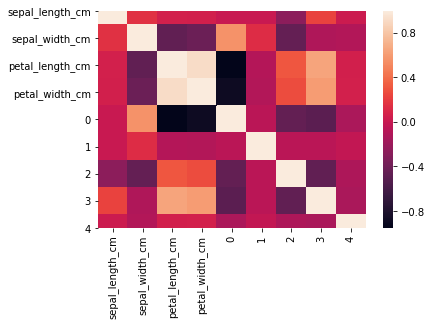

In [102]:
sns.heatmap(x.corr())

In [168]:
lm.predict(X_test)

array([ 4.00000000e+00,  4.00000000e+00,  2.00000000e+00,  2.00000000e+00,
        4.00000000e+00,  2.00000000e+00, -1.77635684e-15,  4.00000000e+00,
        3.00000000e+00,  4.00000000e+00,  4.00000000e+00,  4.00000000e+00,
        2.00000000e+00,  0.00000000e+00,  2.00000000e+00,  4.00000000e+00,
       -1.77635684e-15, -1.77635684e-15,  2.00000000e+00,  8.88178420e-16,
        4.44089210e-16,  2.00000000e+00,  8.88178420e-16,  4.00000000e+00,
        4.00000000e+00,  3.00000000e+00,  2.00000000e+00, -8.88178420e-16,
       -4.44089210e-16, -4.44089210e-16])

In [172]:
x =i_df
X_train, X_test, y_train, y_test = train_test_split(x, Y, train_size=0.8)

In [173]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
print(lm.score(X_test, y_test))

0.7804040458298622
